In [1]:
# AdaBoosting with Decision Tree Amazon Baby Review
import pandas as pd
import numpy as np
import nltk
import string
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sparse

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from nltk.corpus import stopwords
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:

#reading reviews using pandas library from amazon_baby_train.csv file
reviews = pd.read_csv('amazon_baby_train.csv')
reviews.shape

# dropping observations which are incomplete
reviews = reviews.dropna()
reviews.shape

# changing the reviews into positive and negative reviews
scores = reviews['rating']
reviews['rating'] = reviews['rating'].apply(lambda x: 'pos' if x > 3 else 'neg')

# printing the mean and standard deviation of ratings
print(scores.mean())
print(scores.std())

4.120430078052725
1.2853703237434095


In [3]:
#grouping the reviews into positive and negative
reviews.groupby('rating')['review'].count()

rating
neg     34398
pos    111529
Name: review, dtype: int64

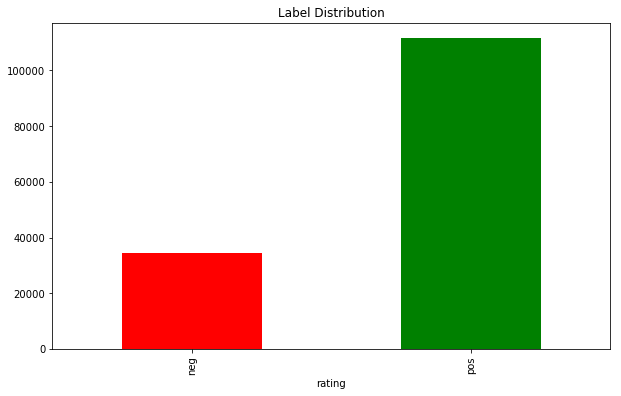

In [4]:
# plotting a graph which counts the number of positive and negative labels
reviews.groupby('rating')['review'].count().plot(kind='bar', color= ['r','g'],title='Label Distribution',  figsize = (10,6))

In [5]:
# splitting the positive and negative review and storing them in separate arrays
def splitPosNeg(Summaries):
    neg = reviews.loc[Summaries['rating']== 'neg']
    pos = reviews.loc[Summaries['rating']== 'pos']
    return [pos,neg]

In [6]:
# splitting the positive and negative review and storing them in separate arrays
[pos,neg] = splitPosNeg(reviews)

In [7]:
# Using lemmatizer to lemmatizze words
lemmatizer = nltk.WordNetLemmatizer()

# using stop words to remove the words which do not contribute to the sentiment
stops = stopwords.words('english')
stops.remove('not')
stops.remove('no')
translation = str.maketrans(string.punctuation,' '*len(string.punctuation))

def preprocessing(line):
    tokens=[]
    line = line.translate(translation)
    line = nltk.word_tokenize(line.lower())   
    for t in line:
        stemmed = lemmatizer.lemmatize(t)
        tokens.append(stemmed)
    return ' '.join(tokens)

In [8]:
# Storing the positive and negative reviews in separate arrays
pos_data = []
neg_data = []
for p in pos['review']:
    pos_data.append(preprocessing(p))

for n in neg['review']:
    neg_data.append(preprocessing(n))
print("Done")

Done


In [11]:
# combining the positive and negative reviews
data = pos_data + neg_data
labels = np.concatenate((pos['rating'].values,neg['rating'].values))

In [11]:
# Splitting the dataset into training set and validation set
#[Data_train,Data_test,Train_labels,Test_labels] = train_test_split(data,labels , test_size=0.25, random_state=20160121,stratify=labels)

In [12]:
#tokenizing each sentence from the file into words
t = []
for line in data:
    l = nltk.word_tokenize(line)
    for w in l:
        t.append(w)

In [13]:
# Calculating the frequency dstribution of each word
word_features = nltk.FreqDist(t)
print(len(word_features))

55669


In [17]:
# The most common 5000 words
topwords = [fpair[0] for fpair in list(word_features.most_common(5000))]
print(word_features.most_common(25))

[('the', 611968), ('it', 399752), ('i', 375573), ('and', 365315), ('a', 340757), ('to', 334813), ('is', 205617), ('this', 178855), ('for', 173482), ('my', 147970), ('of', 146494), ('in', 144299), ('that', 121925), ('with', 100826), ('on', 100723), ('wa', 93101), ('but', 92952), ('have', 92851), ('we', 91151), ('t', 88530), ('so', 83602), ('not', 80912), ('s', 77136), ('you', 73961), ('baby', 70749)]


In [19]:
#printing the top 200 most common words
word_his = pd.DataFrame(word_features.most_common(200), columns = ['words','count'])

In [20]:
# Vectorizing the top words
vec = CountVectorizer()
c_fit = vec.fit_transform([' '.join(topwords)])
print(c_fit)

  (0, 3135)	1
  (0, 310)	1
  (0, 3691)	1
  (0, 1567)	1
  (0, 4520)	1
  (0, 2245)	1
  (0, 2643)	1
  (0, 2453)	1
  (0, 1875)	1
  (0, 3149)	1
  (0, 1405)	1
  (0, 207)	1
  (0, 3664)	1
  (0, 2562)	1
  (0, 1239)	1
  (0, 3795)	1
  (0, 892)	1
  (0, 2825)	1
  (0, 4445)	1
  (0, 3340)	1
  (0, 3103)	1
  (0, 4963)	1
  (0, 1721)	1
  (0, 3634)	1
  (0, 3111)	1
  :	:
  (0, 4708)	1
  (0, 4402)	1
  (0, 2914)	1
  (0, 307)	1
  (0, 374)	1
  (0, 4944)	1
  (0, 2853)	1
  (0, 3956)	1
  (0, 4787)	1
  (0, 2010)	1
  (0, 674)	1
  (0, 4739)	1
  (0, 2912)	1
  (0, 4869)	1
  (0, 4383)	1
  (0, 2157)	1
  (0, 2896)	1
  (0, 2764)	1
  (0, 1748)	1
  (0, 4415)	1
  (0, 2264)	1
  (0, 4464)	1
  (0, 253)	1
  (0, 2271)	1
  (0, 4386)	1


In [21]:
# Using Tfidf Transformer on the data
tf_vec = TfidfTransformer()
tf_fit = tf_vec.fit_transform(c_fit)

In [22]:
# Transforming the features using Tfidf transformer
ctr_features = vec.transform(data)
tr_features = tf_vec.transform(ctr_features)

In [23]:
tr_features.shape

(145927, 4967)

In [ ]:
#cte_features = vec.transform(Data_test)
#te_features = tf_vec.transform(cte_features)

In [25]:
# Using AdaBoost classifier to classify the data
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=50),n_estimators=120, learning_rate=0.1)
clf = clf.fit(tr_features, labels)

In [26]:
#predicting the output
tfPredication = clf.predict(tr_features)
tfAccuracy = metrics.accuracy_score(tfPredication,labels)
print("Accuracy on the Training dataset:")
print(tfAccuracy*100)

ValueError: Found input variables with inconsistent numbers of samples: [1, 3]

In [ ]:
# printing the metrics
print(metrics.classification_report(labels, tfPredication))

In [ ]:
#Testing set

In [ ]:
#reading reviews using pandas library from amazon_baby_test.csv file
reviews = pd.read_csv('amazon_baby_test.csv')
reviews.shape

# dropping observations which are incomplete
reviews = reviews.dropna()
reviews.shape

# changing the reviews into positive and negative reviews
scores = reviews['rating']
reviews['rating'] = reviews['rating'].apply(lambda x: 'pos' if x > 3 else 'neg')

# calculating the mean of reviews
scores.mean()

In [ ]:
#grouping the reviews into positive and negative
reviews.groupby('rating')['review'].count()

In [ ]:
# plotting a graph which counts the number of positive and negative labels
reviews.groupby('rating')['review'].count().plot(kind='bar', color= ['r','g'],title='Label Distribution',  figsize = (10,6))

In [ ]:
# splitting the positive and negative review and storing them in separate arrays
[pos,neg] = splitPosNeg(reviews)

In [ ]:
# Storing the positive and negative reviews in separate arrays
pos_data = []
neg_data = []
for p in pos['review']:
    pos_data.append(preprocessing(p))

for n in neg['review']:
    neg_data.append(preprocessing(n))
print("Done")

In [ ]:
# combining the positive and negative reviews
data = pos_data + neg_data
labels = np.concatenate((pos['rating'].values,neg['rating'].values))

In [ ]:
#tokenizing each sentence from the file into words
t = []
for line in data:
    l = nltk.word_tokenize(line)
    for w in l:
        t.append(w)

In [ ]:
# Calculating the frequency dstribution of each word
word_features = nltk.FreqDist(t)
print(len(word_features))

In [ ]:
# The most common 5002 words
topwords = [fpair[0] for fpair in list(word_features.most_common(5002))]
print(word_features.most_common(25))

In [ ]:
#printing the top 200 most common words
word_his = pd.DataFrame(word_features.most_common(200), columns = ['words','count'])

In [ ]:
# Vectorizing the top words
vec = CountVectorizer()
c_fit = vec.fit_transform([' '.join(topwords)])

In [ ]:
# Using Tfidf Transformer on the data
tf_vec = TfidfTransformer()
tf_fit = tf_vec.fit_transform(c_fit)

In [ ]:
# Transforming the features using Tfidf transformer
cte_features = vec.transform(data)
te_features = tf_vec.transform(cte_features)

In [ ]:
te_features.shape

In [ ]:
#predicting the output
tePredication = clf.predict(te_features)
teAccuracy = metrics.accuracy_score(tePredication,labels)
print(teAccuracy)

In [ ]:
# printing the metrics
print(metrics.classification_report(labels, tePredication))